In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

# Задание 1

<tr>
    <li>Базово изучите датасет (достаточно методов info() и describe()).</li>
    <li>Выдвиньте пару гипотез, например, “Верно ли, что чем выше ВВП, тем выше и уровень счастья?” или “Есть ли взаимосвязь между уровнем доверия правительству и уровнем счастья?”. Постарайтесь подтвердить или опровергнуть их визуально и с помощью расчётов.</li>
    <li>Желательно, но не обязательно:</li>
    <li>Составьте корреляционную матрицу всех числовых признаков набора данных и визуализируйте её с помощью тепловой карты.</li>
</tr>

In [250]:
df = pd.read_csv('happines_corruption.csv')
df.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


In [254]:
df[df.duplicated()]

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score


In [256]:
df.describe()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,0.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000


In [258]:
df.isna().sum()

Country              0
happiness_score      0
gdp_per_capita       0
family               0
health               0
freedom              0
generosity           0
government_trust     0
dystopia_residual    0
continent            0
Year                 0
social_support       0
cpi_score            0
dtype: int64

### Гипотеза 1:
Чем выше ВВП, тем выше и уровень счастья:

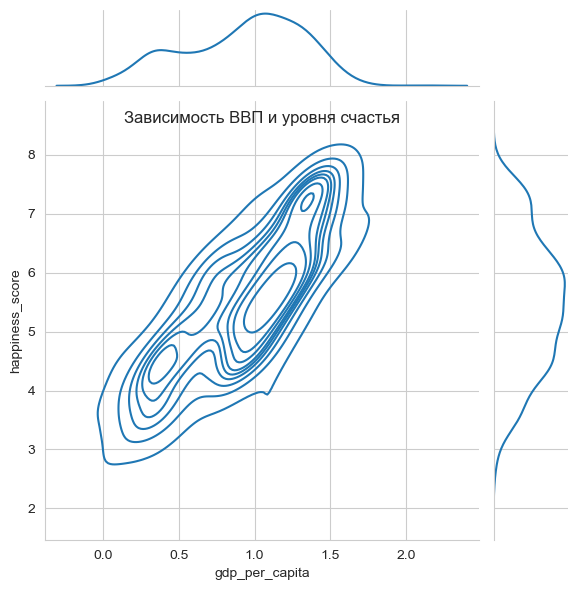

In [260]:
ax = sns.jointplot(data = df, x = 'gdp_per_capita', y = 'happiness_score', kind = 'kde')
ax.ax_joint.set_title('Зависимость ВВП и уровня счастья', y = 0.93)
plt.show()

Из графика прослеживается прямая зависимость между ВВП и уровнем счастья. Можно предположить, что гипотеза верна.

Для количественного расчета взаимосвязи между ВВП и уровнем счастья применим коэффициент корелляции Пирсона, т.к. взаимосвязь похожа на линейную:

In [262]:
df[['gdp_per_capita', 'happiness_score']].corr()

,gdp_per_capita,happiness_score
gdp_per_capita,1.000000,0.793267
happiness_score,0.793267,1.000000


Высокий коэффициент корелляции между показателями подтверждает линейную взаимосвязь между ними.

### Гипотеза 2:
Есть взаимосвязь между уровнем доверия правительству и уровнем счастья

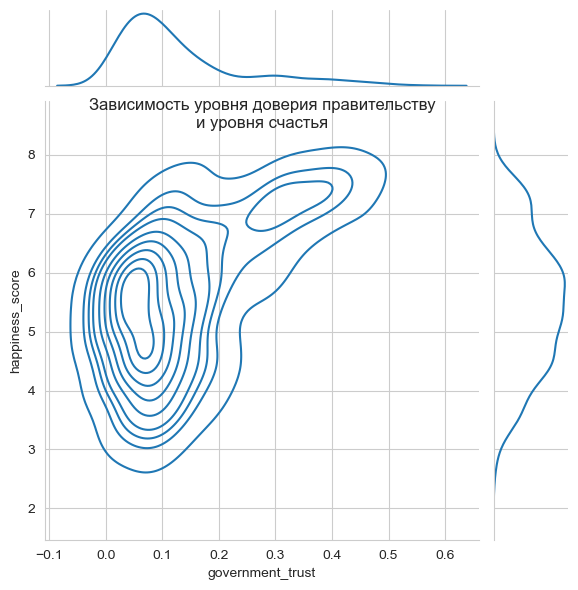

In [264]:
ax = sns.jointplot(data = df, x = 'government_trust', y = 'happiness_score', kind = 'kde')
ax.ax_joint.set_title('Зависимость уровня доверия правительству' + '\n' + 'и уровня счастья', y = 0.92)
plt.show()

Прямой взаимосвязи между уровнем доверия к правительству и уровнем счастья не просматривается. К тому же, при превышении уровня доверия отметки 0.25 рост уровня счастья замедляется.

Для оценки взаимосвязи между уровнем доверия правительству и уровнем счастья применим коэффициент корелляции Спирмена, т.к. взаимосвязь не линейна:

In [266]:
df[['government_trust', 'happiness_score']].corr(method = 'spearman')

,government_trust,happiness_score
government_trust,1.000000,0.351135
happiness_score,0.351135,1.000000


### Тепловая карта взаимосвязи между показателями:

In [268]:
df2 = df.drop(columns = ['Country', 'continent'])

[]

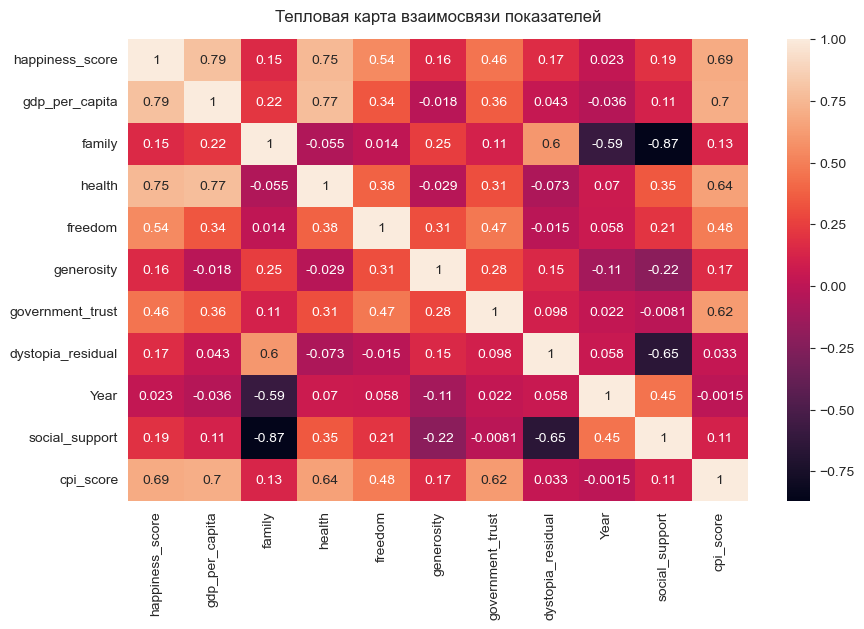

In [270]:
plt.figure(figsize = (10, 6))
plt.title('Тепловая карта взаимосвязи показателей', y = 1.02)
sns.heatmap(df2.corr(), annot = True)
plt.plot()

Из тепловой карты видно, что наиболее крепкая взаимосвязь у уровня счастья с показателями ВВП и здоровья.

# Задание 2

<tr>
    <li>Оставьте только два столбца:'Temperature' и 'Sum'.</li>
    <li>Постройте диаграмму рассеяния.</li>
    <li>Постройте модель линейной регрессии для выбранных признаков.</li>
    <li>Рассчитайте точность модели на тестовой выборке.</li>
    <li>Выведите график остатков.</li>
</tr>

In [272]:
df_2 = pd.read_csv('gas_sales_data.csv', usecols = ['Temperature', 'Sum'])
df_2.head()

,Temperature,Sum
0,-1.20,1717175
1,-0.99,1766341
2,6.64,1490537
3,12.11,1096964
4,17.59,790248


In [274]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  252 non-null    float64
 1   Sum          252 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.1 KB


In [276]:
df_2[df_2.duplicated()]

,Temperature,Sum


In [278]:
round(df_2.describe(), 2)

,Temperature,Sum
count,252.00,252.00
mean,13.37,1666574.03
std,9.54,796576.17
min,-5.74,451322.00
25%,4.66,1094284.00
50%,14.32,1436071.50
75%,22.26,2226305.75
max,28.56,3748910.00


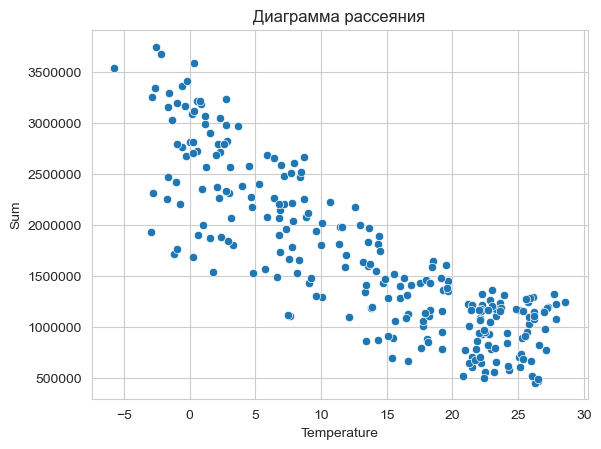

In [280]:
plt.ticklabel_format(style = 'plain')
plt.title('Диаграмма рассеяния')
sns.scatterplot(data = df_2, x = 'Temperature', y = 'Sum')
plt.show()

Из диаграммы видим обратную корелляцию между температурой и потреблением топлива. Чем выше темпрература, тем меньше топлива потребляется.

### Построим модель линейной регрессии:

In [282]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [284]:
X = df_2[['Temperature']]
y = df_2['Sum']

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [288]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(176, 1)
(176,)
(76, 1)
(76,)


In [290]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [292]:
model.coef_

array([-68983.48774441])

In [294]:
model.intercept_

2571553.8716537543

Получили уравнение линейной регрессии:<br/><b>y = -68584.65 * X + 256349.79</b>

In [296]:
y_pred = model.predict(X_test)
y_pred

array([2507399.22805145, 1411251.6077928 ,  700031.84914794,
       1072542.68296775, 1003559.19522334, 2403923.99643484,
       2499811.04439957, 1087029.21539408, 1042879.78323765,
       1783762.44161261, 2316314.96699944, 1247070.9069611 ,
       2561206.34849209, 1585089.99690871, 1035981.43446321,
       1045639.12274743,  907672.14725861, 1429187.31460634,
       1088408.88514896, 1108414.09659484, 2360464.39915586,
        793849.39248034, 2534302.78827177, 1217408.00723101,
        944923.23064059,  894565.28458718, 1905863.21492021,
       2425998.71251305, 1990712.90484583, 2353566.05038142,
        984933.65353235, 1241552.22794155, 1293979.6786273 ,
        936645.21211126, 1358134.3222296 , 1985194.22582628,
       1836189.89229836, 2421169.86837094, 2488083.85148302,
       1530593.04159062,  741421.94179459, 1219477.51186334,
        789020.54833823, 1578191.64813427, 2411512.18008673,
       2461870.12614014, 1249140.41159344, 2752290.60954411,
       2551548.66020788,

In [298]:
y_test

73     2351639
237    1405517
79      774058
56      668565
65      816837
        ...   
180    3119243
74     2076614
206    2589575
223    1237111
214    2208192
Name: Sum, Length: 76, dtype: int64

### Посчитаем точность модели:

In [300]:
model.score(X_test, y_test)

0.7751026957980487

Коэффициент детерминации 0.78 показывает, что построенная модель хорошо объясняет тестовую выбрку.

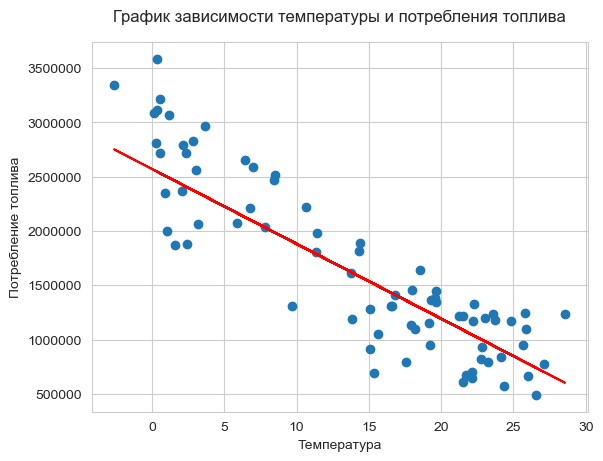

In [327]:
plt.ticklabel_format(style = 'plain')
plt.title('График зависимости температуры и потребления топлива', pad = 15)
plt.xlabel('Температура')
plt.ylabel('Потребление топлива')
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c = 'r')
plt.show()

Из графика видно, что построенная модель (прямая красная линия) не плохо аппроксимирует разброс данных в тестовой выборке.

### Альтернативный способ:

In [304]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [306]:
X_const = sm.add_constant(X_train)

In [308]:
X_const

,const,Temperature
199,1.0,27.90
125,1.0,23.34
243,1.0,11.60
210,1.0,26.98
130,1.0,7.35
...,...,...
49,1.0,3.00
179,1.0,-1.34
250,1.0,9.00
53,1.0,22.93


In [310]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Sum   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     438.9
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           1.89e-49
Time:                        21:37:18   Log-Likelihood:                -2529.6
No. Observations:                 176   AIC:                             5063.
Df Residuals:                     174   BIC:                             5070.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.572e+06   5.37e+04     47.916      

In [312]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const          2.571554e+06
Temperature   -6.898349e+04
dtype: float64
R2:  0.716115537087567


Видно, что коэффициент детерминации R2 = 0.72. Это показывает, что модель не плохо описывает распределение в выборке.

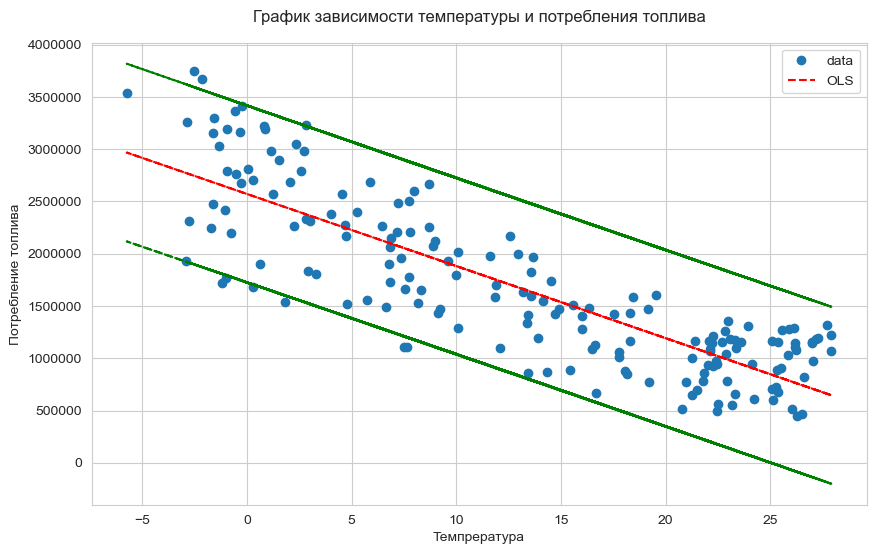

In [335]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize = (10, 6))

plt.ticklabel_format(style = 'plain')
plt.title('График зависимости температуры и потребления топлива', pad = 15)
plt.xlabel('Темпрература')
plt.ylabel('Потребление топлива')

ax.plot(X_const.iloc[:, 1], y_train, 'o', label = 'data')
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--', label = 'OLS')
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend()

plt.show()

### Графики остатков:

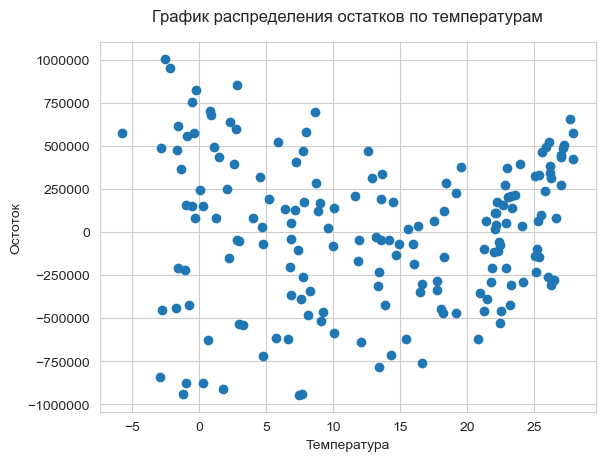

In [351]:
plt.ticklabel_format(style = 'plain')
plt.scatter(X_const.iloc[:, 1], results.resid)
plt.title('График распределения остатков по температурам', pad = 15)
plt.xlabel('Температура')
plt.ylabel('Остоток')
plt.show()

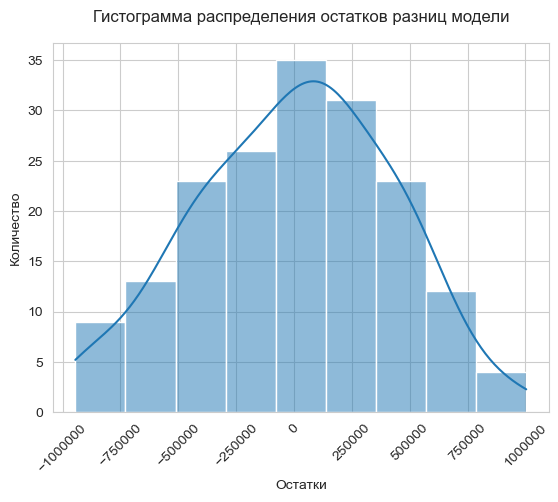

In [349]:
plt.ticklabel_format(style = 'plain')
plt.xticks(rotation = 45)
plt.title('Гистограмма распределения остатков разниц модели', pad = 15)
plt.xlabel('Остатки')
plt.ylabel('Количество')
sns.histplot(data = results.resid, kde = True)
plt.show()

На графике видно, что распределение остатков похоже нормальное с центром в нуле.